[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kruth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kruth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


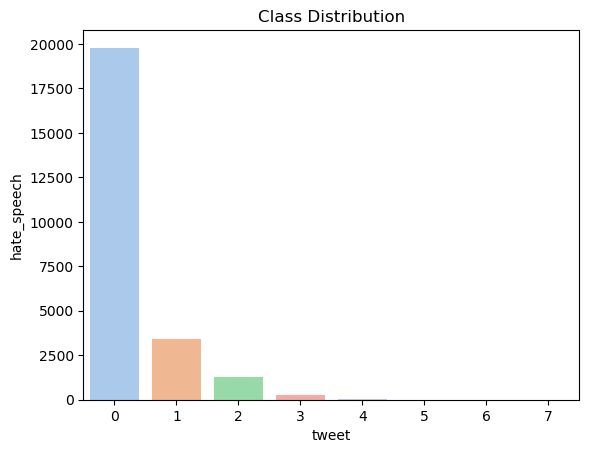

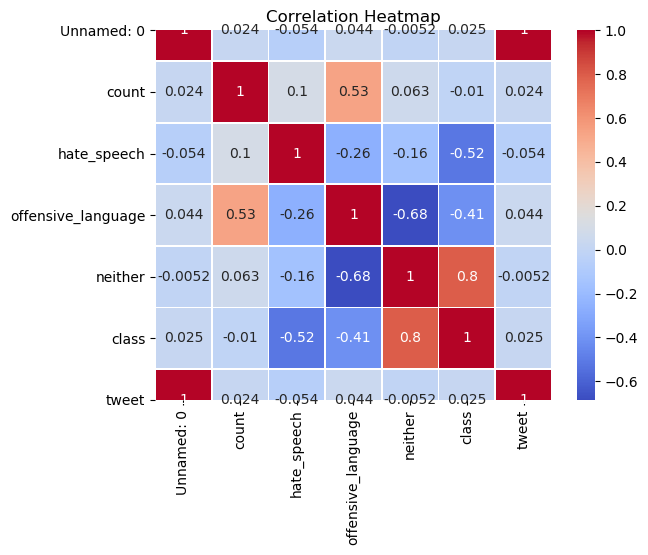

c:\users\kruth\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kruth\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kruth\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.77      1.00      0.87      3832
           2       0.00      0.00      0.00       835

    accuracy                           0.77      4957
   macro avg       0.26      0.33      0.29      4957
weighted avg       0.60      0.77      0.67      4957



Enter the text to classify:  hello


Predicted class:  1


In [23]:
import pandas as pd
import re
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
data = pd.read_csv('labeled_data.csv')

# Data preprocessing
def preprocess_text(text):
    # Remove non-alphanumeric characters and lowercasing
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    return text

# Label encoding for object columns
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':  # Check if column contains string values
        data[column] = label_encoder.fit_transform(data[column])
sns.countplot(data=data, x='hate_speech', palette='pastel')
plt.xlabel('tweet')
plt.ylabel('hate_speech')
plt.title('Class Distribution')
plt.show()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# Convert numeric values in 'tweet' column to strings
data['tweet'] = data['tweet'].astype(str)

# Feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(data['tweet'])
y = data['class']  # Assuming 'class' column contains class labels (hate speech or not)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)

# Evaluate model
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Input text for classification
new_text = input("Enter the text to classify: ")
new_text_preprocessed = preprocess_text(new_text)
new_text_vectorized = tfidf_vectorizer.transform([new_text_preprocessed])
prediction = svm_classifier.predict(new_text_vectorized)
print("Predicted class: ", prediction[0])
